# Log Analysis

In [5]:
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data = []

with open('SSH.log', 'r') as f:    

    for line in f:
        log = line
        month = re.search(r'\w{3}', log).group()
        day = re.search(r'\d{2}', log).group()
        time = re.search(r'\d{2}:\d{2}:\d{2}', log).group()

        timestamp = month + ' ' + day + ' ' + time

        session_id = re.search(r'\[\d+\]', log).group()
        session_id = re.search(r'\d+', session_id).group()
        text = re.search(r'\[\d+\](.*)', log).group()
        text = text.replace(f'[{session_id}]: ', '')

        data.append([timestamp, session_id, text])

df = pd.DataFrame(data, columns=['timestamp', 'session_id', 'event'])
df   

,timestamp,session_id,event
0,Dec 10 06:55:46,24200,reverse mapping checking getaddrinfo for usern...
1,Dec 10 06:55:46,24200,invalid user username from 173.234.31.186
2,Dec 10 06:55:46,24200,input_userauth_request: invalid user username ...
3,Dec 10 06:55:46,24200,pam_unix(sshd:auth): check pass; user unknown
4,Dec 10 06:55:46,24200,pam_unix(sshd:auth): authentication failure; l...
...,...,...,...
655142,Jan 17 17:07:14,30222,Received disconnect from 185.165.29.69: 11: By...
655143,Jan 17 17:13:12,30238,Accepted password for username from 137.189.20...
655144,Jan 17 17:13:12,30238,pam_unix(sshd:session): session opened for use...
655145,Jan 17 17:22:01,30291,Accepted password for username from 183.11.69....


## a)

In [3]:
df['event'] = df['event'].str.replace(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', '@@')
df['event'] = df['event'].str.replace(r'\d+', '##')
df

,timestamp,session_id,event
0,Dec 10 06:55:46,24200,reverse mapping checking getaddrinfo for usern...
1,Dec 10 06:55:46,24200,invalid user username from @@
2,Dec 10 06:55:46,24200,input_userauth_request: invalid user username ...
3,Dec 10 06:55:46,24200,pam_unix(sshd:auth): check pass; user unknown
4,Dec 10 06:55:46,24200,pam_unix(sshd:auth): authentication failure; l...
...,...,...,...
655142,Jan 17 17:07:14,30222,Received disconnect from @@: ##: Bye Bye [prea...
655143,Jan 17 17:13:12,30238,Accepted password for username from @@ port ##...
655144,Jan 17 17:13:12,30238,pam_unix(sshd:session): session opened for use...
655145,Jan 17 17:22:01,30291,Accepted password for username from @@ port ##...


80


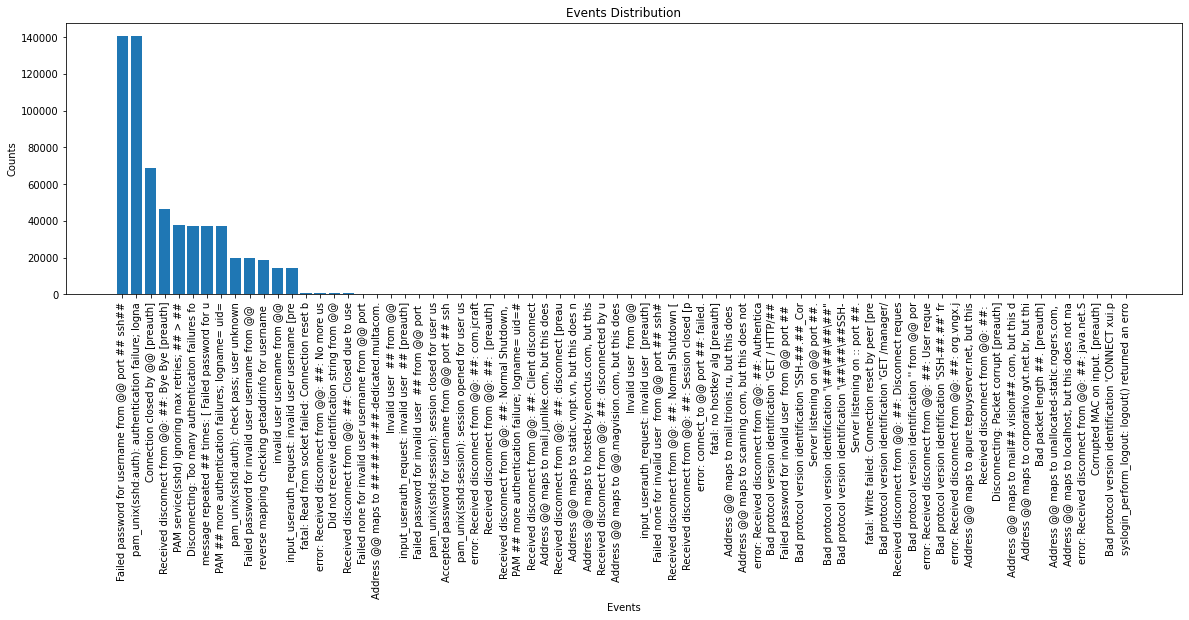

In [6]:
event_dist = df['event'].value_counts().sort_values(ascending=False)

print(len(event_dist))

events_label = [event[:50] for event in event_dist.index]

plt.figure(figsize=(20,5))

xx = plt.bar(events_label, event_dist)
plt.xticks(rotation=90);

plt.xlabel('Events')
plt.ylabel('Counts')
plt.title('Events Distribution');

## b)

In [7]:
events = df['event'].unique()
events_index_dict = dict(zip(events, range(len(events))))

matrix = pd.DataFrame(index=events_index_dict.values(), columns=events_index_dict.values())
matrix.fillna(0, inplace=True)

print(len(df['event']))
for i in range(len(df['event'])-1):
    if i % 100000 == 0:
        print(i)

    matrix.loc[events_index_dict[df['event'][i]], events_index_dict[df['event'][i+1]]] += 1

655147
0
100000
200000
300000
400000
500000
600000


0 reverse mapping checking getaddrinfo for username [@@] failed - POSSIBLE BREAK-IN ATTEMPT!
1 invalid user username from @@
2 input_userauth_request: invalid user username [preauth]
3 pam_unix(sshd:auth): check pass; user unknown
4 pam_unix(sshd:auth): authentication failure; logname= uid=## euid=## tty=ssh ruser= rhost=@@ 
5 Failed password for invalid user username from @@ port ## ssh##
6 Connection closed by @@ [preauth]
7 Received disconnect from @@: ##: Bye Bye [preauth]
8 pam_unix(sshd:auth): authentication failure; logname= uid=## euid=## tty=ssh ruser= rhost=@@  user=username
9 Failed password for username from @@ port ## ssh##
10 message repeated ## times: [ Failed password for username from @@ port ## ssh##]
11 Disconnecting: Too many authentication failures for username [preauth]
12 PAM ## more authentication failures; logname= uid=## euid=## tty=ssh ruser= rhost=@@  user=username
13 PAM service(sshd) ignoring max retries; ## > ##
14 Did not receive identification string fr

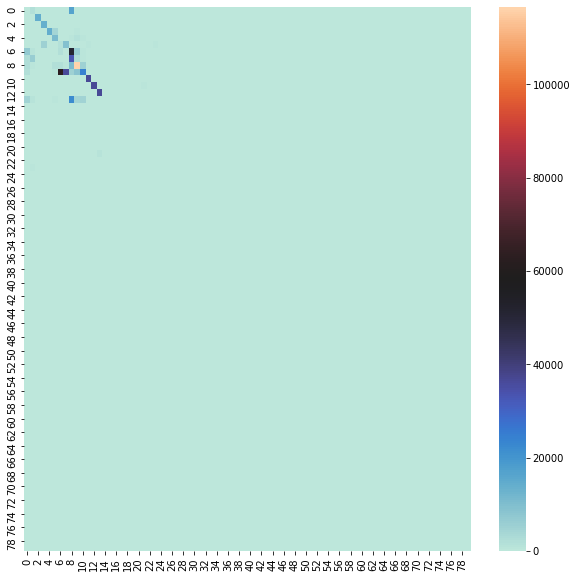

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, cmap="icefire")

for i, event in enumerate(list(events_index_dict.keys())[:15]):
    print(i, event)